In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import math
from math import fabs

In [ ]:
eps = (1.e-7) * 5
p1 = len('Ледяев')
p2 = len('Антон')
q1 = len('Алексеевич')
q2 = len('Антон')

p = complex(p1, p2)
q = complex(q1, q2)
r = 1

print(f"Функция, которую будем исследовать: z^2 + {p}z + {q}")

Функция, которую будем исследовать: z^2 + (6+5j)z + (10+5j)


In [ ]:

def function(x, y):
    return x**4 + 12*x**3 + 2*x**2 * y**2 + 10*x**2*y + 81*x**2 + 12*x*y**2 + 20*x*y + 170*x + y**4 + 10*y**3 + 41*y**2 - 40*y + 125
   
def diff_function_x(x, y):
    return 4*x**3 + 36*x**2 + 4*x*y**2 + 20*x*y + 162*x + 12*y**2 + 20*y + 170

def diff_function_y(x, y):
    return 4*y*x**2 + 10*x**2 + 24*x*y + 20* x + 4*y**3 + 30*y**2 + 82*y - 40

In [ ]:
def line(x, y):
 return x - y
def circle(x, y):
 return x**2 + y**2 - 1

In [ ]:
def function_for_graphic(x, y):
  if line(x,y)<=0 and circle(x,y) <= 0:
    return function(x,y)
  else:
    return np.nan

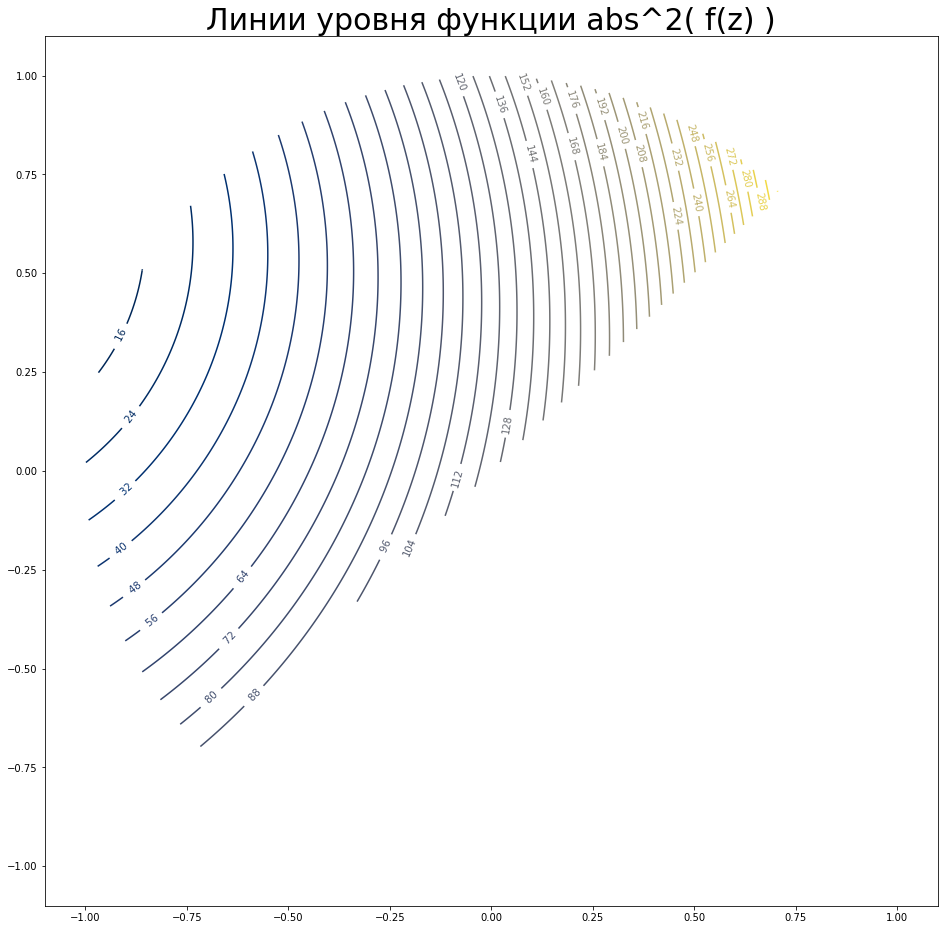

In [ ]:
def no_color_contour_show(function, radius):
  amount = np.int(1000)
  x = np.linspace(-radius - 0.1, radius + 0.1, amount)
  y = np.linspace(-radius - 0.1, radius + 0.1, amount)
  x,y = np.meshgrid(x,y)
  f = np.vectorize(function)
  z = f(x, y)
  fig = plt.figure(figsize=(16,16))
  ax = plt.subplot()
  cs = ax.contour(x, y, z, levels = 40,cmap='cividis')
  ax.clabel(cs, fmt = "%3.0f")
  plt.title("Линии уровня функции abs^2( f(z) )", fontsize = 30, loc = 'center')

  plt.show()
no_color_contour_show(function_for_graphic, r)

In [ ]:
def show_trace(x_history, y_history, function):
  amount = np.int(1000)
  x = np.linspace(-1.1, 1.1, amount)
  y = np.linspace(-1.1, 1.1, amount)
  x, y = np.meshgrid(x,y)
  f = np.vectorize(function)
  z = f(x, y)
  fig = plt.figure(figsize=(16,16))
  ax = plt.subplot()
  cs = ax.contourf(x, y, z, levels = 40,cmap='cividis')
  plt.title("Ход оптимизации функции abs^2( f(z) )", fontsize = 30, loc = 'center')
  plt.scatter(x_history, y_history, c = 'deeppink')
  plt.show()


Result: Re = -0.92263 Im = 0.38570 abs^2(f) = 14.44369


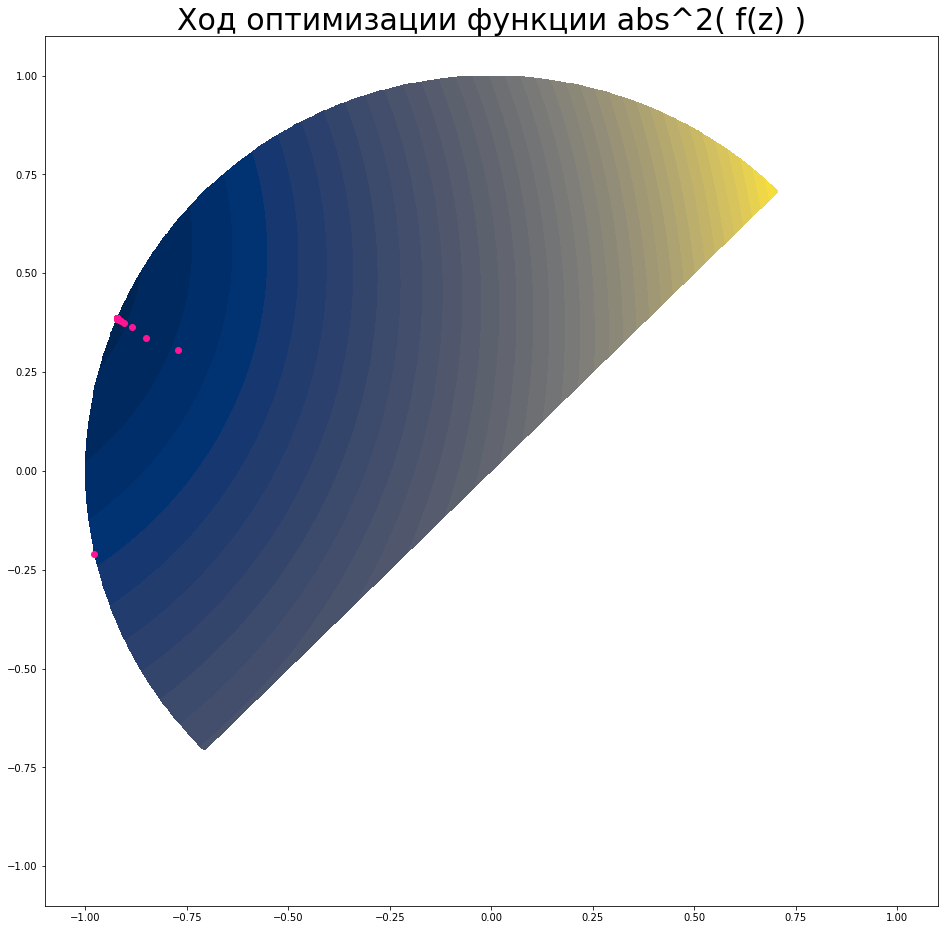

,Alpha,Re,Im,abs^2(func),|z|,gradient_x,gradient_y,Норма
Step,,,,,,,,
0,1.0,-0.977815,-0.209472,37.663228,1.0000000,290.875000,62.312500,297.474559
1,0.5,-0.772465,0.307084,25.046734,0.8312652,42.536733,-61.777504,75.005557
2,0.5,-0.851373,0.336966,19.380036,0.9156317,66.735950,-26.316693,71.737405
3,0.5,-0.885902,0.363934,16.820358,0.9577427,57.680782,-24.496722,62.667073
4,0.5,-0.904504,0.374239,15.609140,0.9788684,53.906844,-22.456317,58.397209
5,0.5,-0.913460,0.380218,15.020694,0.9894320,51.851595,-21.709205,56.212787
6,0.5,-0.918077,0.382876,14.730759,0.9947158,50.874015,-21.256896,55.136386
7,0.5,-0.920337,0.384320,14.586864,0.9973578,50.367505,-21.060147,54.593180
8,0.5,-0.921487,0.384995,14.515184,0.9986789,50.120948,-20.950940,54.323580


In [ ]:
def gradient(x, y, tetta):
  alpha = 1
  p_x = np.inf
  p_y = np.inf

  data = { 'Alpha' :[],
            'Re': [],
            'Im': [],
            'abs^2(func)': [],
            '|z|':[],
            'gradient_x':[],
            'gradient_y':[],
            'Норма':[]
  }

  while abs(p_x) > 1e-7 and abs(p_y) > 1e-7:
    gradient_x = diff_function_x(x, y)
    gradient_y = diff_function_y(x, y)
    gradient_norma = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    x_k = 0 + r * (-gradient_x) / gradient_norma
    y_k = 0 + r * (-gradient_y) / gradient_norma
    p_x = x_k - x
    p_y = y_k - y
    new_x = x + alpha * p_x
    new_y = y + alpha * p_y

    if  function(new_x, new_y) - function(x, y) < 0 and line(new_x, new_y) <= 0 and circle(new_x, new_y) <= 0:
      x = new_x
      y = new_y
      data['Alpha'].append(alpha)
      data['Re'].append(x)
      data['Im'].append(y)
      data['abs^2(func)'].append(function(x, y))
      data['|z|'].append('%.7f'%np.sqrt(x**2 + y**2))
      data['gradient_x'].append(gradient_x)
      data['gradient_y'].append(gradient_y)
      data['Норма'].append(gradient_norma)
    else:
      alpha *= tetta

  data = pd.DataFrame(data)
  data.index.rename('Step', inplace=True)
  return complex(x, y), function(x, y), data


res, fun, data = gradient(0.5, 0.75, 0.5)

print("Result: Re = {0} Im = {1} abs^2(f) = {2}".format('%.5f' % res.real, '%.5f' % res.imag, '%.5f' % fun))
show_trace(data['Re'], data['Im'], function_for_graphic)
data
